# Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Reading the data

In [3]:
real = pd.read_csv("Real estate.csv", index_col=0)

In [4]:
real.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
real.columns = ['Transaction date','House age','Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude','House price of unit area']

In [7]:
real

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [8]:
col = ['Transaction date']
real[col] = real[col].applymap(np.int64)

In [9]:
real

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
No,,,,,,,
1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013,18.8,390.96960,7,24.97923,121.53986,40.6


<AxesSubplot:xlabel='House age', ylabel='House price of unit area'>

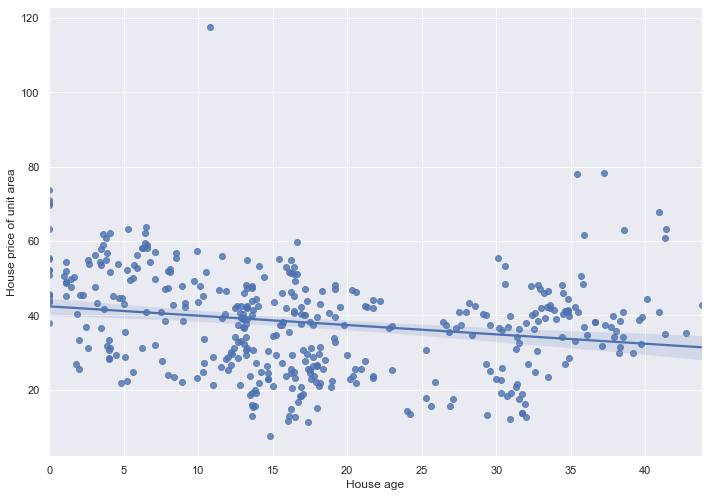

In [10]:
sns.regplot(x = "House age", y = "House price of unit area", data = real)

# Simple Linear Regression

In [12]:
X = real['House age']
y = real['House price of unit area']

In [14]:
model = LinearRegression()

In [15]:
model.fit(np.array(X).reshape(-1,1),y)

LinearRegression()

In [16]:
model.intercept_ #b0

42.4346970462629

In [17]:
model.coef_ #b1

array([-0.25148842])

In [19]:
model.score(np.array(X).reshape(-1,1),y)

0.04433848097791171

# Multiple Linear Regression

In [23]:
x = real[['House age','Distance to the nearest MRT station','Number of convenience stores']]
y = real['House price of unit area']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.intercept_

43.558905268386226

In [27]:
model.coef_

array([-0.24842433, -0.00536076,  1.08063941])

In [28]:
model.score(X_train, y_train)

0.5462821837035738

In [29]:
model.predict(X_test)

array([46.77086642, 30.5413363 , 29.46198678, 33.87347578, 33.42857842,
       39.2104534 , 42.78288078, 46.46253097, 37.96091212, 36.33851519,
       29.46830175, 34.6958052 , 38.5113026 , 39.8672176 , 17.70420446,
       47.33411459, 43.04416829, 17.56054519, 24.48958962, 33.11529943,
       41.85691309, 51.23467362, 33.84082061, 48.4720514 , 40.57253585,
       46.91516142, 51.33404335, 43.11869559, 31.68707195, 38.35784711,
       51.06831451, 37.24653159, 48.73171529, 40.39665582, 45.31749976,
       50.03831319, 32.42907019, 29.52475247, 32.08127666, 35.46695549,
       51.38372822, 42.09021901, 34.44754287, 44.20870417, 43.04343945,
       51.18498875, 31.45427775, 29.57443734, 40.49124816, 48.92561066,
       32.74514665, 48.4720514 , 30.46525096, 32.0316065 , 38.42003704,
       42.17948072, 40.47950848, 36.76719557, 38.362248  , 43.38662796,
       48.75655772, 43.87884186, 29.82028526, 40.00205499, 30.86357494,
       42.59546119, 47.16740352, 48.4720514 , 23.60192834, 46.19

In [30]:
y_test.values

array([50.4, 28.1, 13.7, 25.3, 22.3, 40.3, 78. , 47. , 43.9, 25.6, 13.8,
       23. , 37.7, 42.5, 18.6, 63.2, 42.3, 20.7, 24.7, 29.4, 41.5, 58.1,
       31.5, 73.6, 37.3, 47.1, 56.3, 42.5, 38.4, 34.3, 57.8, 21.7, 54.4,
       41. , 43.7, 44.8, 27.3, 21.8, 39.7, 38.8, 53.5, 40.3, 61.5, 49.3,
       78.3, 63.9, 24.8, 23.8, 38.1, 45.7, 20.9, 69.7, 27. , 23.5, 37.8,
       41. , 28.5, 36.5, 38.2, 51.4, 50.7, 40.6, 27.7, 36.2, 27.7, 40.1,
       57.4, 71. , 46.6, 55.1, 26.5, 36.3, 42.9, 59. , 25.9, 45.5, 43.5,
       29.5, 27.3, 42.2, 12.8, 39.5, 31.3])

In [31]:
model.score(X_test, model.predict(X_test))

1.0

In [32]:
model.score(X_train, model.predict(X_train))


1.0

In [33]:
model.score(X_test, y_test)

0.5045177517064982

In [34]:
model.score(X_train, y_train)

0.5462821837035738

In [35]:
pd.get_dummies(real['House age'], drop_first = True)

,1.0,1.1,1.5,1.7,1.8,1.9,2.0,2.1,2.3,2.5,...,39.2,39.6,39.7,39.8,40.1,40.9,41.3,41.4,42.7,43.8
No,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Check assumptions of LR

<AxesSubplot:xlabel='House age', ylabel='House price of unit area'>

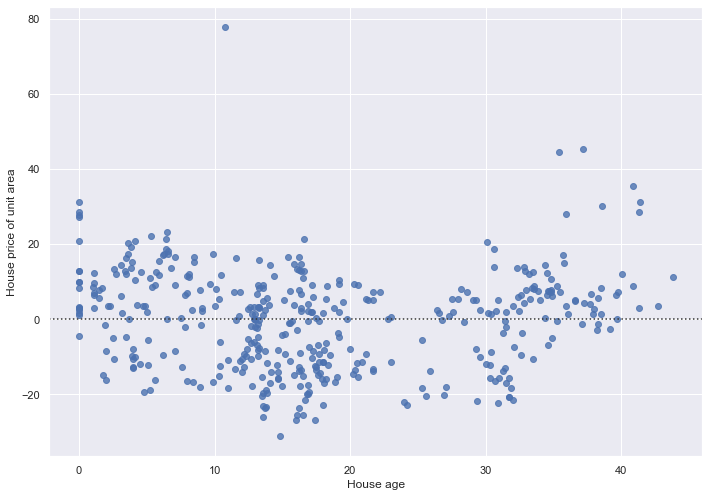

In [36]:
sns.residplot(x = "House age",y = "House price of unit area",data = real)

# Check assumptions of MLR

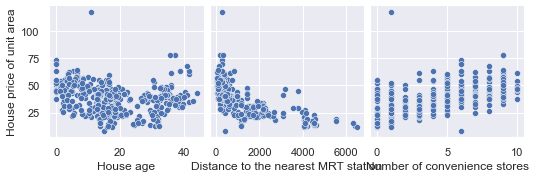

In [38]:
sns.pairplot(real,x_vars=["House age","Distance to the nearest MRT station","Number of convenience stores"], y_vars='House price of unit area')